## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'

# 5. 데이터 분석
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>

# 5.0. [데이터 분석을 위한 준비과정] 데이터 합치기

#### [5.0.1] 데이터 합치기
* 지금까지 1~4에서 준비한 데이터 파일
    * 버스 정류장 데이터 - df_seoul_bus_station.csv
    * 유동인구 데이터 - df_seoul_moving.csv
    * 구별 등록 인구 데이터 - df_seoul_people.csv
    * 구별 상권 데이터 - df_seoul_business.csv
* 아래 제시되는 'standard' 데이터 프레임을 기준으로 활용하여, 지금까지 1~4에서 준비한 데이터를 각각 불러와서 합쳐 주세요.
* 이후에는 이 합쳐진 데이터 프레임을 기반으로 미션을 수행하기 위한 분석을 진행합니다.

In [1]:
import sys
import numpy as np
import pandas as pd

In [2]:
# 데이터 합치기 진행 시, 아래 제시되는 정보를 활용하세요.
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# '5. 데이터 분석'은 자세한 가이드가 제공되지 않으니, 각자의 방법으로 진행해주세요.
standard = pd.read_csv('all.csv')
standard

,도착 시군구 코드,자치구,버스정류장,노선,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동시간 합계,이동인구 합계,...,커피사업체,커피종사자,셔츠도매사업체,셔츠도매종사자,주점사업체,주점종사자,학원사업체,학원종사자,육류사업체,육류종사자
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,8538540,19343343.60,...,948,3613,400,962,537,1413,110,382,437,1982
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,8496210,19673357.11,...,869,3542,10810,24248,381,982,57,175,443,2121
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,7700390,14664517.37,...,634,2076,54,317,487,1332,104,573,300,1184
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,8037450,17406840.45,...,547,1859,149,1572,285,621,258,1494,400,1545
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,7721980,17904746.49,...,590,1887,89,687,633,1577,413,1646,467,1678
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,7926550,16243959.28,...,494,1472,211,976,499,1082,302,984,442,1509
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,6956750,13862596.09,...,381,1037,63,284,535,1000,288,1045,499,1504
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,8128260,18711978.35,...,457,1384,85,454,512,1030,464,1755,365,1334
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,6670400,12527162.80,...,358,1095,40,94,580,1275,220,740,362,1176
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,6028430,10780997.75,...,288,837,22,43,258,477,351,1162,302,943


In [5]:
standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도착 시군구 코드  25 non-null     int64  
 1   자치구        25 non-null     object 
 2   버스정류장      25 non-null     int64  
 3   노선         25 non-null     int64  
 4   승차총승객수     25 non-null     int64  
 5   하차총승객수     25 non-null     int64  
 6   승차평균승객수    25 non-null     float64
 7   하차평균승객수    25 non-null     float64
 8   이동시간 합계    25 non-null     int64  
 9   이동인구 합계    25 non-null     float64
 10  이동시간 평균    25 non-null     float64
 11  이동인구 평균    25 non-null     float64
 12  세대수        25 non-null     int64  
 13  전체인구       25 non-null     int64  
 14  남성         25 non-null     int64  
 15  여성         25 non-null     int64  
 16  한국인        25 non-null     int64  
 17  한국남성       25 non-null     int64  
 18  한국여성       25 non-null     int64  
 19  외국인        25 non-null     int64  
 20  외국남성       2

In [6]:
standard.describe

<bound method NDFrame.describe of     도착 시군구 코드   자치구  버스정류장   노선   승차총승객수   하차총승객수     승차평균승객수     하차평균승객수  \
0       11010   종로구    349  106  5468935  5205394  131.889620  125.534028   
1       11020    중구    178  103  3776675  3598932  121.020124  115.324511   
2       11030   용산구    323   67  4189977  4086474  137.891694  134.485421   
3       11040   성동구    435   58  2807280  2746738   96.377369   94.298888   
4       11050   광진구    269   41  2749448  2753411  118.352546  118.523137   
5       11060  동대문구    306   73  5240565  5115379  131.841430  128.692017   
6       11070   중랑구    380   48  3792541  3740923   87.403863   86.214261   
7       11080   성북구    602   99  6236424  6231238  123.251922  123.149430   
8       11090   강북구    413   67  4825181  4671783  133.020373  128.791504   
9       11100   도봉구    359   46  3304305  3211421  106.859356  103.855540   
10      11110   노원구    514   57  4353295  4292724   88.476211   87.245168   
11      11120   은평구    501   71  5201660  

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

<Axes: xlabel='자치구', ylabel='노선'>

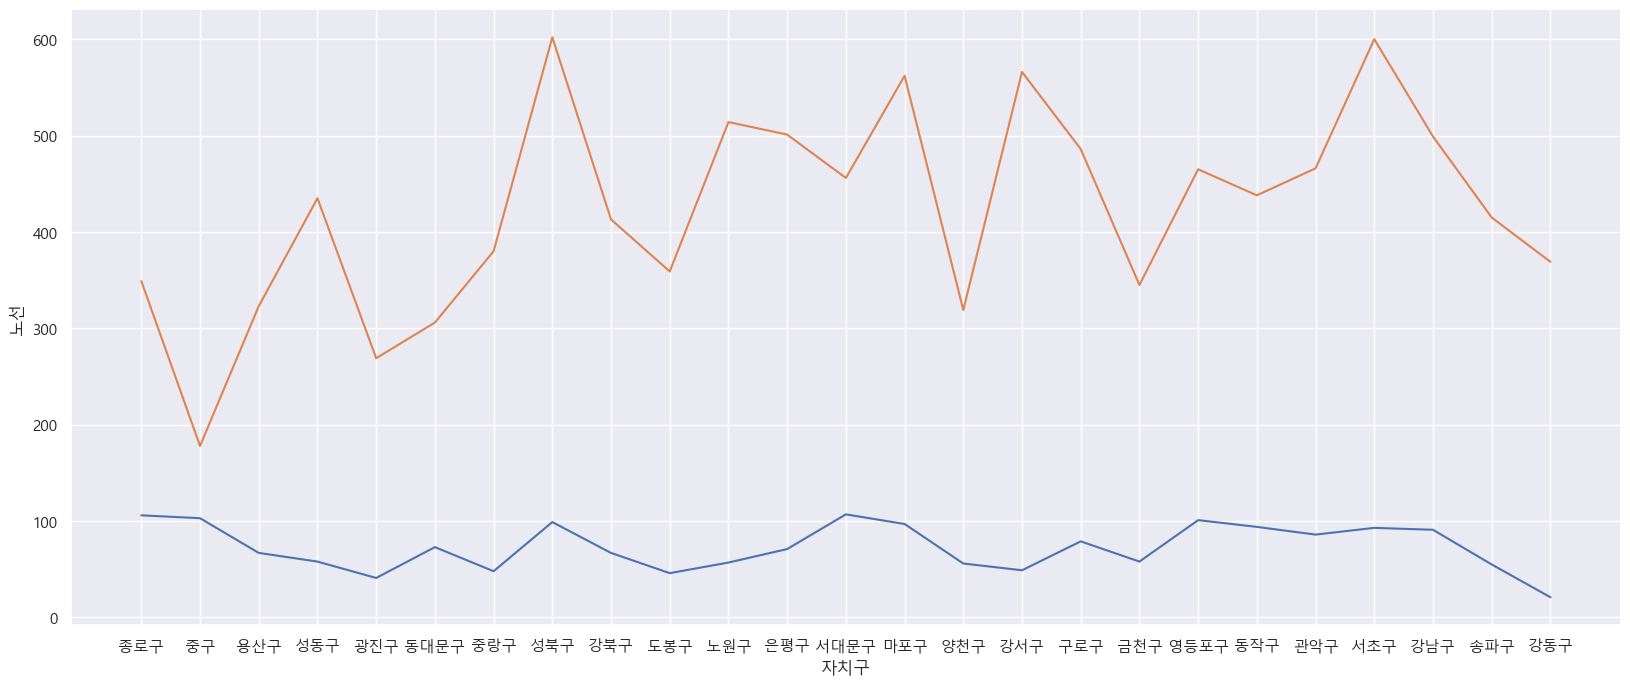

In [15]:
plt.figure(figsize=(20,8))
sns.lineplot(x='자치구', y='노선',data=standard)
sns.lineplot(x='자치구', y='버스정류장',data=standard)


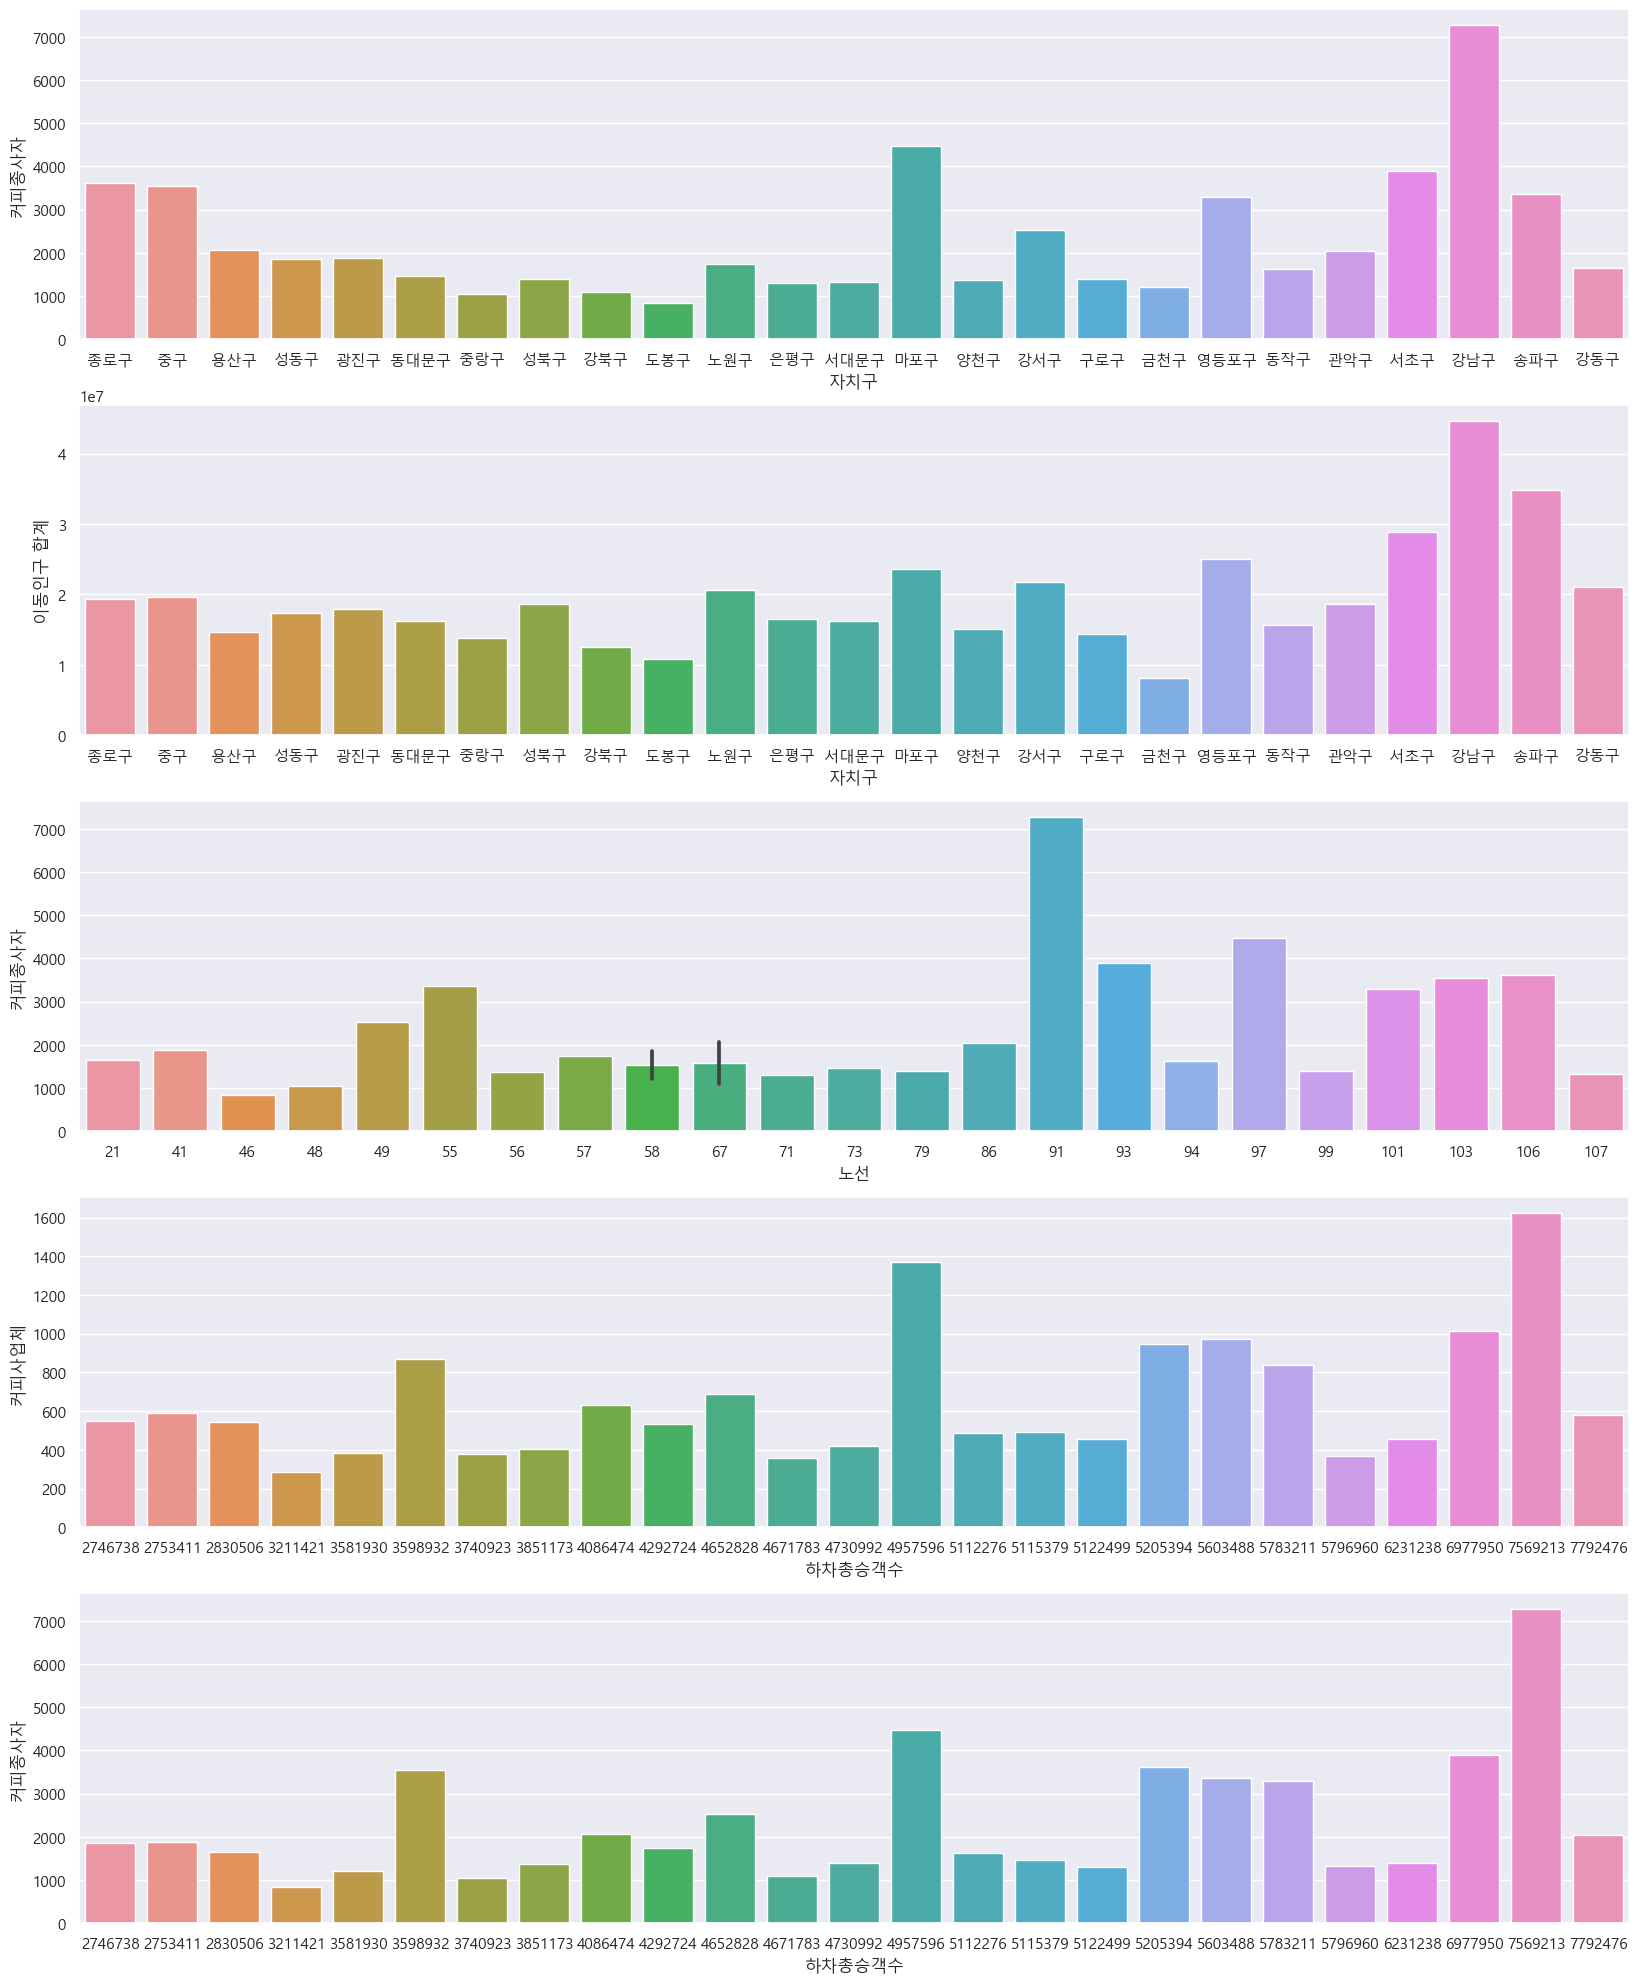

In [29]:
plt.figure(figsize=(20,30))
plt.subplot(6,1,1)
sns.barplot(x='자치구',y='커피종사자',data=standard)
plt.subplot(6,1,2)
sns.barplot(x='자치구',y='이동인구 합계',data=standard)
plt.subplot(6,1,3)
sns.barplot(x='노선',y='커피종사자',data=standard)
plt.subplot(6,1,4)
sns.barplot(x='하차총승객수',y='커피사업체',data=standard)
plt.subplot(6,1,5)
sns.barplot(x='하차총승객수',y='커피종사자',data=standard)
# plt.subplot(6,1,6)
# sns.barplot(x='외국인',y='하차총승객수',data=standard)
plt.show()

In [13]:
#상관분석
# spst.pearsonr(standard[''])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


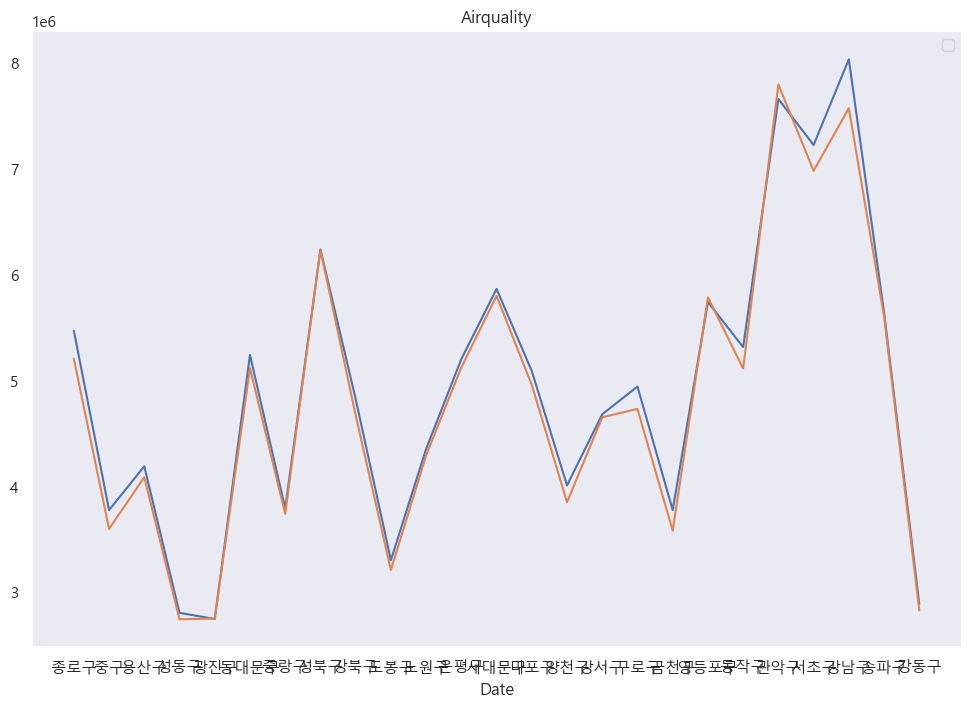

In [16]:
#그래프 크기
plt.figure(figsize=(12,8))

#그래프 그리기
plt.plot(standard['자치구'],standard['승차총승객수'])

plt.plot(standard['자치구'],standard['하차총승객수'])

# plt.plot('자치구','외국인',data=standard,label='Ozone')
#꾸미기
plt.xlabel('Date')
plt.title('Airquality')
plt.legend(loc='upper right')
plt.grid()

#마무리
plt.show()

In [15]:
# #그래프 크기(생략가능)
# plt.figure(figsize=(12,8))

# #그래프 그리기
# plt.plot('Date','Ozone',data=standard,label='Ozone')
# plt.plot('Date','Temp',data=standard,label='Temp')
# plt.plot('Date','Wind',data=standard,label='Wind')

# #꾸미기(생략가능)
# plt.xlabel('Date')
# plt.title('Airquality')
# plt.legend(loc='upper right')
# plt.grid()

# #마무리(생략가능, 주의!)
# plt.show()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,74018,79666,153684,2,5912,3613,1413
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,63869,67581,131450,20,6414,3542,982
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,114571,121947,236518,36,2987,2076,1332
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,8887140,17449273.95,141662,149947,291609,53,2785,1859,621
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,8625540,17947278.99,169525,183585,353110,71,2861,1887,1577


C:\Users\User\AppData\Local\Temp\ipykernel_17540\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.533514,0.610548,0.235541,0.473119,0.697314,0.675779,0.687074,0.999351,0.308156,0.267956,0.318339
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.223747,0.374723,0.356947,0.355635,0.550032,0.580536,0.566615,0.433391,0.146445,0.209808,0.315121
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003649,0.388332,0.226437,-0.294351,-0.268906,-0.281536,-0.085764,0.413556,0.425180,0.262016
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.474049,0.581339,0.576553,0.359532,0.368034,0.364433,0.426003,0.574076,0.530386,0.493852
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463898,0.572769,0.558699,0.384499,0.390470,0.388119,0.426352,0.538578,0.494266,0.485755
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.382202,-0.079733,0.140483,0.067920,-0.255715,-0.282278,-0.269854,0.015474,0.257629,0.204745,0.220043
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.356171,-0.072466,0.148381,0.062384,-0.192074,-0.221558,-0.207643,0.026276,0.212645,0.160374,0.227213
평균 이동 시간(분),0.533514,0.223747,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,1.000000,0.373091,-0.141914,0.095727,0.644669,0.631852,0.638885,0.544275,-0.128780,-0.181316,-0.034993
이동인구평균,0.610548,0.374723,-0.003649,0.474049,0.463898,-0.079733,-0.072466,0.373091,1.000000,0.808313,0.951399,0.681313,0.708455,0.696328,0.617066,0.745931,0.736411,0.615303
총 이동시간,0.235541,0.356947,0.388332,0.581339,0.572769,0.140483,0.148381,-0.141914,0.808313,1.000000,0.923298,0.350985,0.393565,0.373570,0.236683,0.816341,0.835772,0.655550


# 5.1.가설 수립

## 5.1.1.가설 수립 
+ 어떤 데이터를 label 데이터(y)로 해야 할 지 생각해보아 정하세요.
    * 설정한 가설에 따라(가설 마다) y는 다를 수 있습니다. 개인/조 마다 y는 다를 수 있습니다.
+ 가설의 개수는 제한이 없습니다. (조 별로 적어도 3개 이상 설정하세요.)
+ 가설 예시
    * 가설 1 정류장 수와 승차 총 승객수
        * H0 : 정류장 수와 승차 총 승객수는 연관이 없다
        * H1 : 정류장 수와 승차 총 승객수는 연관이 있다
    * 가설 2 노선 수와 총 이동시간
        * H0 : 노선 수와 총 이동시간은 연관이 없다
        * H1 : 노선 수와 총 이동시간은 연관이 있다
    * 가설 3 정류장 수와 이동인구(합)
    * 가설 4 노선 수와 평균 이동 시간
    * 가설 5 노선 수와 커피전문점 이용자수

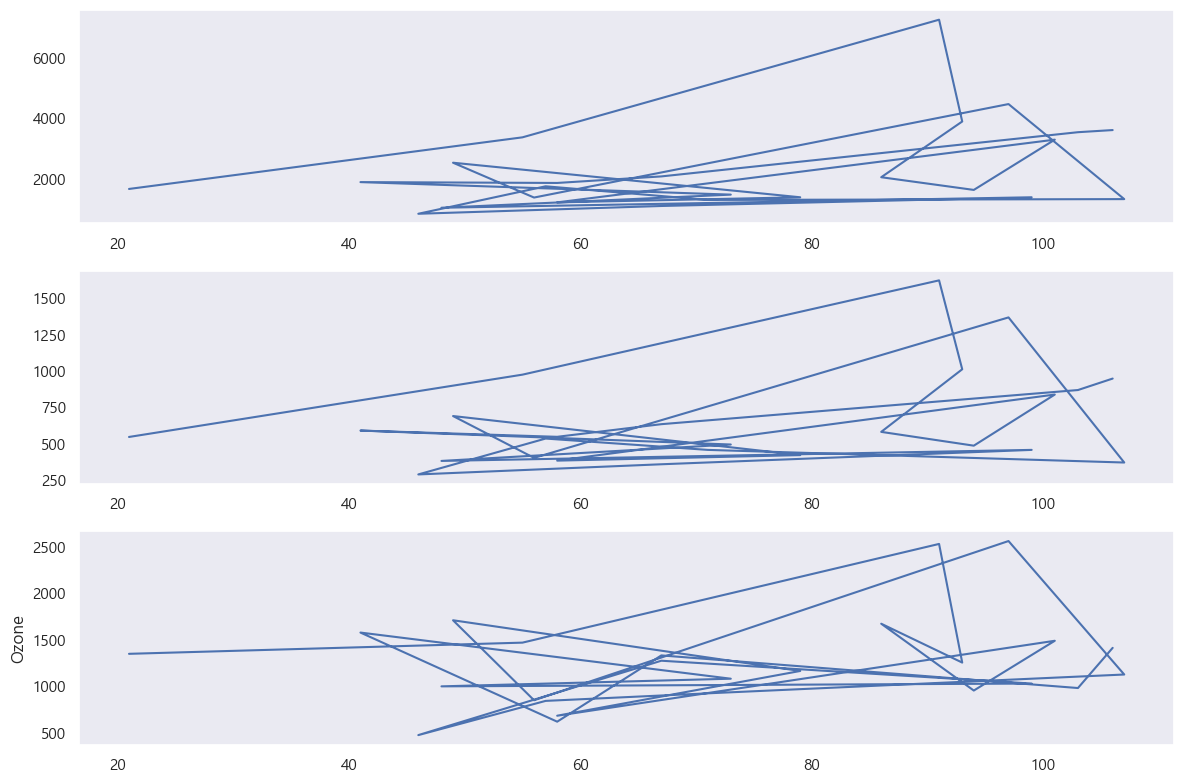

In [17]:
# 아래에 코드를 작성하고 결과를 확인합니다.

plt.figure(figsize = (12,8))
plt.subplot(3,1,1) #subplot(row, column, index) 3행 1열의 첫번째 그래프
plt.plot('노선', '커피종사자', data = standard)
plt.grid() #꾸미는 것은 각각 해야함

plt.subplot(3,1,2) #3행 1열의 두번째 그래프
plt.plot('노선', '커피사업체', data = standard)
plt.grid()

plt.subplot(3,1,3) #3행 1열의 세번째 그래프
plt.plot('노선', '주점종사자', data = standard)
plt.grid()
plt.ylabel('Ozone')

plt.tight_layout() # 그래프간 간격을 적절히 맞추기, 여백 줄이는
plt.show()

## 5.1.2.단변량 분석

* 아래 제시되는 내용들을 참고하여 단변량 분석을 진행합니다. 
    * 변수의 비즈니스 의미  
    * 변수가 숫자형인지 범주형인지 판단하여 진행
    * 전처리가 필요한지 확인하고 필요 시 진행: NaN 존재 여부 및 조치 방안, 가변수화 대상여부  
    * 기초통계량 분석
    * 데이터 분포 분석  
    * 위 정보로부터 파악한 내용을 비즈니스 관점에서 정리  
    * 추가 분석해볼 사항 도출하여 추가 분석 진행
* 이 프로젝트에서 비즈니스 관점이라 함은 데이터를 분석하는 목적이 어디에 있는가 하는 것을 고려하자는 것입니다.
    * 즉, "서울시 내 어느 자치구에 버스노선 추가가 필요한지를 분석하여 합리적으로 결정하려는 목적"을 가지고 데이터에 근거하기 위해 데이터를 분석하고 정리해야 한다는 의미입니다.

In [97]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)


### 2)

### 3)

## 5.1.3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 시각화와 수치화(가설검정)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* 상관계수 (우리가 배운 기준)
    * 강한: 0.5 < |r| <= 1
    * 중간: 0.2 < |r| <= 0.5
    * 약한: 0.1 < |r| <= 0.2
    * (거의)없음: |r| <= 0.1
* p-value 기준 판단 기준
    * P-value < 0.05이면, 두 변수 간에 관계가 있다. (상관계수가 의미가 있다.)
    * P-value >= 0.05이면, 두 변수 간에 관계가 없다. (상관계수가 의미가 없다.)

In [98]:
import scipy.stats as spst

# 아래에 코드를 작성하고 결과를 확인합니다.


상관계수 : 0.5666813370974585, p-value : 0.003141977397117322


PearsonRResult(statistic=0.38833248798056735, pvalue=0.05507091940045923)

PearsonRResult(statistic=0.42518048108643286, pvalue=0.03410811239601253)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,63869,67581,131450,20,6414,3542,982,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,172318,180274,352592,87,3566,1472,1082,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,250450,249886,500336,340,3689,2049,1672,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,74018,79666,153684,2,5912,3613,1413,0.638150


,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,...,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1,비율2
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,...,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382,125.120308
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,...,21101460.33,227891,237206,465097,432,3388,1660,1349,1.276793,126.506024
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,...,34837613.05,321963,346298,668261,404,5760,3372,1469,0.735588,163.107948
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,...,21839762.06,277797,300629,578426,257,4584,2530,1709,1.209122,193.675889
13,11140,마포구,562,97,5088461,4957596,103.907639,101.235343,22.044201,54.884906,...,23639807.30,176886,201743,378629,221,4705,4475,2559,1.104460,216.759777


## 5.1.4.관계 정리

### 1) 강한 관계의 변수

In [103]:
# 강한 관계의 변수는 무엇인가요?
# 예) 정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

In [104]:
# 중간 관계의 변수는 무엇인가요?
# 예) 노선수 - 커피전문점.1(종사자수)

## 5.1.5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇인가요?

In [105]:
# 솔루션 도출
# 예) 강남구 - 중구 - 동대문구 - 관악구에 필요합니다